In [71]:
import pandas as pd

In [76]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 43

In [77]:
df = pd.read_csv('./winequalityN.csv')
df.dropna(inplace=True)

* highly imbalanced

In [78]:
df['type'] = df.type.map({'red':0, 'white':1}).astype('int')

In [79]:
x_train_val, x_test, y_train_val, y_test = train_test_split(df.drop(columns=['quality', 'type']), df['type'],
                                                             stratify=df['quality'],
                                                             test_size=0.2,
                                                             shuffle=True,
                                                             random_state=RANDOM_SEED )
x_train_val.shape, x_test.shape

((5170, 11), (1293, 11))

In [80]:
x_train, y_train, x_val, y_val = train_test_split(x_train_val, y_train_val,
                                                  stratify=y_train_val,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=RANDOM_SEED )
x_train.shape, x_val.shape

((4136, 11), (4136,))

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
ss = StandardScaler()
x_train_val = ss.fit_transform(x_train_val)
x_test = ss.transform(x_test)

## scorers

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [84]:
def draw_roc_auc(gt, pred):
    fpr, tpr, _ = roc_curve(gt, pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [85]:
from sklearn.linear_model import LogisticRegressionCV

In [86]:
lr = LogisticRegressionCV(random_state=RANDOM_SEED, Cs=10, n_jobs=-1, max_iter=500)
lr.fit(x_train_val, y_train_val)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=43, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

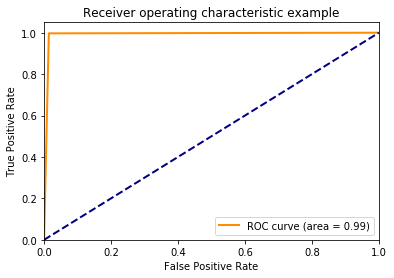

In [89]:
pred = lr.predict(x_train_val)
draw_roc_auc(y_train_val, pred)

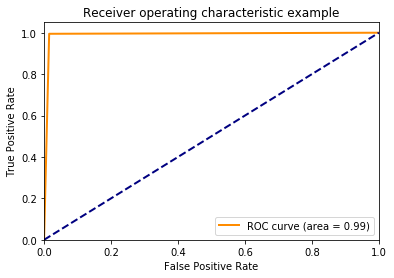

In [92]:
pred = lr.predict(x_test)
draw_roc_auc(y_test, pred)

# I guess there is  no point in improving this any more lets focus on harder parts